# Gerar números aleatórios que represente atividade industrial

A empresa utilizada como exemplo é a Tigre \
Ela tem uma de suas unidades em Joinville \
Nesse sentido, será representado a produção em quilogramas de cano de PVC semanal

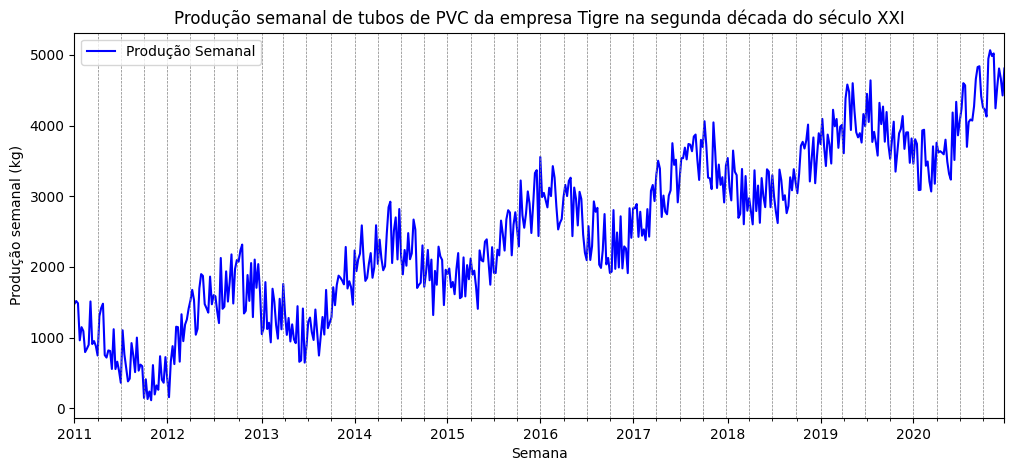

In [97]:
import pandas as pd # Importa a biblioteca pandas e a chama de pd
import numpy as np # Importa a biblioteca numpy e a chama de np
import math as mt # Importa a biblioteca math e a chama de mt
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib.pyplot e a chama de plt

# Criar um dataframe
df_pvc = pd.DataFrame()

# Criar uma série de datas no primeiro domingo de semana em semana da primeira semana da segunda década do século XX até a última semana da segunda década
dsemana = np.arange(np.datetime64("2011-01-02"), np.datetime64("2021-01-02"), np.timedelta64(1,"W"))

# Adicionando coluna semana com a série de dados dsemana no dataframe df_pvc
df_pvc['Semana'] = dsemana

# Colocando a Semana como index
df_pvc =df_pvc.set_index(df_pvc['Semana']) 

# Criando colunas com ano
df_pvc['Ano'] = df_pvc.index.year

# Adicionando coluna variação(kg) com números de -500 a 500 no dataframe df_pvc
df_pvc['Variação(kg)'] = ((np.random.rand(df_pvc.shape[0]))*2-1)*500

# Criando um array com o tamanho de linhas do dataframe, indo de 0 até o número de linhas do dataframe df_pvc menos 1
tt = np.arange(0,df_pvc.shape[0],1) 
        
# Adicionando coluna de produção semanal com função senoidal a cada 87 semanas
df_pvc['Produção semanal(kg)'] = 600 + 500*(np.cos((tt)/(87/(2*mt.pi))))

# Definindo valor da variável a
a = 0

# Adicionando acréscimo de 200 kg a cada 29 semanas para sempre
for i in range(len(df_pvc)): # Estrutura de repetição que vai de 0 até o tamanho do dataframe df_pvc
    if i%29 == 0: # Se a razão do i dividido por 29 for 0, então faz a próxima linha
        a = a + 200 # Soma a com 200
    # Código que localiza a linha i da coluna Produção semanal(kg) e soma o valor de a
    df_pvc.iloc[i, df_pvc.columns.get_loc('Produção semanal(kg)')] = df_pvc.iloc[i, df_pvc.columns.get_loc('Produção semanal(kg)')] + a

# Criando a coluna Produção total(kg) com a soma das variáveis da coluna Variação(kg) e Produção semanal(kg)
df_pvc['Produção total(kg)'] = df_pvc['Variação(kg)'] + df_pvc['Produção semanal(kg)'] 

# Criando o plot, definindo o tamanho da figura de 12 por 5
fig, ax = plt.subplots(figsize=(12, 5))

# Plotando a produção semanal com cor azul
df_pvc['Produção total(kg)'].plot(color='blue', ax=ax, label='Produção Semanal')

# Adicionando título
ax.set_title('Produção semanal de tubos de PVC da empresa Tigre na segunda década do século XXI')

# Adiciona legenda
ax.legend()

# Adicionando Produção semanal (kg) no eixo y
ax.set_ylabel('Produção semanal (kg)')

# Criando um datetime para os trimestres do primeiro ao último do dataframe df_pvc 
trimestres = pd.date_range(start=df_pvc.index.min(), end=df_pvc.index.max(), freq='QE')

# Estrutura de repetição for para a cada data, de trimestre, adicionar linhas pontilhadas cinzas
for data in trimestres:
    ax.axvline(x=data, color='gray', linestyle='--', linewidth=0.5)
